__<h1><center>ML Zoomcamp 2023 - Homework #3</center></h1>__

In [1]:
#@ IMPORTING LIBRARIES AND DEPENDENCIES:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction import DictVectorizer

In [2]:
#@ IMPORTING DATASET:
url = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv"
select_cols = ["Make", "Model", "Year", "Engine HP", "Engine Cylinders", "Transmission Type", "Vehicle Style", 
               "highway MPG", "city mpg", "MSRP"]
data = pd.read_csv(url, usecols=select_cols)

In [3]:
data.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


__Data preparation__

In [4]:
data.columns = data.columns.str.replace(' ', '_').str.lower()

In [5]:
print(data.shape)

(11914, 10)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_hp          11845 non-null  float64
 4   engine_cylinders   11884 non-null  float64
 5   transmission_type  11914 non-null  object 
 6   vehicle_style      11914 non-null  object 
 7   highway_mpg        11914 non-null  int64  
 8   city_mpg           11914 non-null  int64  
 9   msrp               11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


In [7]:
selected_features = ['engine_hp', 'engine_cylinders']
data[selected_features] = data[selected_features].fillna(0) #Fill in the missing values of the selected features with 0

# Rename 'MSRP' to 'price'
data = data.rename(columns={'msrp': 'price'})

In [8]:
data.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


__Question 1__
What is the most frequent observation (mode) for the column transmission_type?

* AUTOMATIC
* MANUAL
* AUTOMATED_MANUAL
* DIRECT_DRIVE

In [9]:
mode_transmission_type = data['transmission_type'].mode()[0]

print(mode_transmission_type)

AUTOMATIC


__Question 2__
Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?

* engine_hp and year
* engine_hp and engine_cylinders
* highway_mpg and engine_cylinders
* highway_mpg and city_mpg

In [10]:
selected_columns = ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg' ,'price']
selected_data = data[selected_columns]

selected_data.corr()

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,price
year,1.000000,0.338714,-0.040708,0.258240,0.198171,0.227590
engine_hp,0.338714,1.000000,0.774851,-0.415707,-0.424918,0.650095
engine_cylinders,-0.040708,0.774851,1.000000,-0.614541,-0.587306,0.526274
highway_mpg,0.258240,-0.415707,-0.614541,1.000000,0.886829,-0.160043
city_mpg,0.198171,-0.424918,-0.587306,0.886829,1.000000,-0.157676
price,0.227590,0.650095,0.526274,-0.160043,-0.157676,1.000000


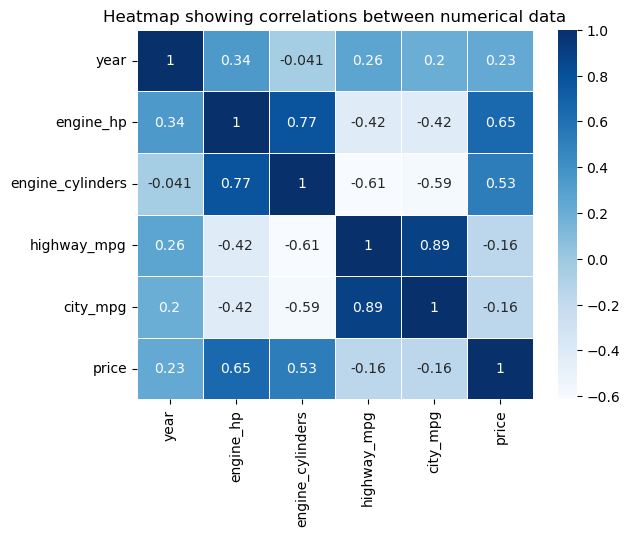

In [11]:
#@ INSPECTING HEATMAP:
plt.figure()  
sns.heatmap(selected_data.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

__Make price binary__

Now we need to turn the price variable from numeric into a binary format.
Let's create a variable above_average which is 1 if the price is above its mean value and 0 otherwise.

In [12]:
# Calculate the mean of the 'price' column
mean_price = data['price'].mean()

# Create a new column 'above_average' based on the condition
data['above_average'] = (data['price'] > mean_price).astype(int)

In [13]:
data.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0


__Split the data__ 

Split your data in train/val/test sets with 60%/20%/20% distribution.
Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
Make sure that the target value (above_average) is not in your dataframe.

In [14]:
# Define features (X) and target (y)
X = data.drop(columns=['above_average'])
y = data['above_average']

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Verify the shapes of the sets
print(f"Train set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")


Train set shape: (7148, 10)
Validation set shape: (2383, 10)
Test set shape: (2383, 10)


__Question 3__

Calculate the mutual information score between above_average and other categorical variables in our dataset. Use the training set only.
Round the scores to 2 decimals using round(score, 2).
Which of these variables has the lowest mutual information score?

* make
* model
* transmission_type
* vehicle_style

In [15]:
# Get the categorical columns
categorical_columns = ['make', 'model', 'transmission_type', 'vehicle_style']

# Apply label encoding to categorical columns
label_encoder = LabelEncoder()
X_train_encoded = X_train[categorical_columns].apply(label_encoder.fit_transform)

# Calculate mutual information scores
mi_scores = mutual_info_classif(X_train_encoded, y_train)

# Create a dictionary to store variable names and their mutual information scores
mi_scores_dict = dict(zip(categorical_columns, mi_scores))

# Find the variable with the lowest score
lowest_score_variable = min(mi_scores_dict, key=mi_scores_dict.get)

# Round the scores to 2 decimal places
mi_scores_dict = {k: round(v, 2) for k, v in mi_scores_dict.items()}

print("Mutual Information Scores:")
print(mi_scores_dict)
print(f"\nThe variable with the lowest mutual information score is: {lowest_score_variable}")

Mutual Information Scores:
{'make': 0.02, 'model': 0.0, 'transmission_type': 0.01, 'vehicle_style': 0.03}

The variable with the lowest mutual information score is: model


/Users/anastasia_lukashenko/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/anastasia_lukashenko/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/anastasia_lukashenko/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/anastasia_lukashenko/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `

__Question 4__
Now let's train a logistic regression.
Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
Fit the model on the training dataset.
To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
Calculate the accuracy on the validation dataset and round it to 2 decimal digits.
What accuracy did you get?

* 0.60
* 0.72
* 0.84
* 0.95

In [16]:
# Define categorical and numerical columns
cat = ['make', 'model', 'transmission_type', 'vehicle_style']
num = ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'price']


# Creating the target variable 'above_average'
mean_price = data['price'].mean()
data['above_average'] = (data['price'] > mean_price).astype(int)
y_train = data['above_average']

# Separate features and target variable
X = data[cat + num]

# One-hot encode categorical variables using pandas
X_encoded = pd.get_dummies(X, columns=cat, drop_first=True)

# Training Logistic Regression model
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_encoded, y_train)

# Calculate accuracy on the validation dataset
accuracy = model.score(X_encoded, y_train)

# Print accuracy
rounded_accuracy = round(accuracy, 3)
print(f"The accuracy on the validation dataset is: {rounded_accuracy}")

/Users/anastasia_lukashenko/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/anastasia_lukashenko/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/anastasia_lukashenko/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/anastasia_lukashenko/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated

The accuracy on the validation dataset is: 0.999


/Users/anastasia_lukashenko/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/anastasia_lukashenko/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


The accuracy on the validation dataset is: 0.999

__Question 5__
Let's find the least useful feature using the feature elimination technique.
Train a model with all these features (using the same parameters as in Q4).
Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
Which of following feature has the smallest difference?

* year
* engine_hp
* transmission_type
* city_mpg

Note: the difference doesn't have to be positive



In [17]:
# Define a function to calculate accuracy without a specific feature
def calculate_accuracy_without_feature(feature_to_exclude):
    # Create a copy of X_encoded without the specified feature
    X_without_feature = X_encoded.drop(columns=feature_to_exclude)
    
    # Train a Logistic Regression model
    model_without_feature = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    model_without_feature.fit(X_without_feature, y_train)
    
    # Calculate accuracy
    accuracy_without_feature = model_without_feature.score(X_without_feature, y_train)
    
    return accuracy_without_feature

# Calculate original accuracy
original_accuracy = model.score(X_encoded, y_train)

# List of features to evaluate
features_to_evaluate = ['year', 'engine_hp', 'city_mpg']

# Dictionary to store feature differences
feature_differences = {}

# Calculate accuracy without each feature
for feature in features_to_evaluate:
    accuracy_without_feature = calculate_accuracy_without_feature(feature)
    difference = original_accuracy - accuracy_without_feature
    feature_differences[feature] = difference

# Find the feature with the smallest difference
min_difference_feature = min(feature_differences, key=feature_differences.get)

# Print the result
print(f"The feature with the smallest difference is: {min_difference_feature}")



/Users/anastasia_lukashenko/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/anastasia_lukashenko/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/anastasia_lukashenko/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/anastasia_lukashenko/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated

The feature with the smallest difference is: engine_hp


/Users/anastasia_lukashenko/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/anastasia_lukashenko/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/anastasia_lukashenko/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/anastasia_lukashenko/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated

__Question 6__
For this question, we'll see how to use a linear regression model from Scikit-Learn.
We'll need to use the original column price. Apply the logarithmic transformation to this column.
Fit the Ridge regression model on the training data with a solver 'sag'. Set the seed to 42.
This model also has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10].
Round your RMSE scores to 3 decimal digits.
Which of these alphas leads to the best RMSE on the validation set?

* 0
* 0.01
* 0.1
* 1
* 10
Note: If there are multiple options, select the smallest alpha.

In [20]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from math import sqrt
data['price_log'] = np.log1p(data['price'])


X_train, X_val = train_test_split(data, random_state=42, test_size=0.2)
y_train = X_train['price_log']
y_val = X_val['price_log']


alphas = [0, 0.01, 0.1, 1, 10]


best_rmse = float('inf')
best_alpha = None


for alpha in alphas:
    model = Ridge(alpha=alpha, solver='sag', random_state=42)
    model.fit(X_train[num], y_train)
    y_pred = model.predict(X_val[num])
    rmse = sqrt(mean_squared_error(y_val, y_pred))


    if rmse < best_rmse:
        best_rmse = rmse
        best_alpha = alpha


best_rmse = round(best_rmse, 3)


print(f"The best alpha for Ridge regression is {best_alpha} with RMSE of {best_rmse}")

/Users/anastasia_lukashenko/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/anastasia_lukashenko/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/anastasia_lukashenko/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/anastasia_lukashenko/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated

/Users/anastasia_lukashenko/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/anastasia_lukashenko/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/anastasia_lukashenko/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/anastasia_lukashenko/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if

The best alpha for Ridge regression is 0 with RMSE of 0.863


/Users/anastasia_lukashenko/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/anastasia_lukashenko/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/anastasia_lukashenko/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/anastasia_lukashenko/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if